In [1]:
# %% Global Variables
datasetPath = "./TM-3-2020"
sourceCodePath = './src'

In [ ]:
!pip install ipywidgets
!pip install sentence_transformers

In [24]:
# %% libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# %% Loads Source code
sys.path.append(os.path.join(os.getcwd(), sourceCodePath))

In [4]:
import chat as ch

In [5]:
dataset = ch.dataset.Dataset(datasetPath)

In [6]:
df = dataset.get_chat_lines_dataframe(100)

In [7]:
df.head()

,conversation_id,index,speaker,text
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...


In [8]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [85]:
unique_user_lines=df[df['speaker'] == 'user']['text'].unique()
unique_assistant_lines=df[df['speaker'] == 'assistant']['text'].unique()

print('user', unique_user_lines[:10])
print('assistant', unique_assistant_lines[:10])

user ['hi....am buying a ticket tonight so we go and see a movie at AMC mountain 16'
 'hhhmmmmm not at all. i dont have any in mind for now'
 'sure you can but i want to see the movie at AMC mountain 16' 'yeah'
 'yeah but 9.10pm will be perfect for me'
 'myself and two other persons are going to see a movie' 'yes you can'
 'ok thanks but i dont need anything again'
 'I am looking for tickets tonight at the AMC Mountain 16'
 'Action if possible']
assistant ['No problem. Is there a particular type of movie you’re looking for?'
 'Sure. I can help with that. Let me listings at AMC Mercado 24.'
 'Oh, sorry about that. So you’re interested in action films at AMC Mountain 16, right?'
 'OK. I show one action movie playing at AMC Mountain 16: No Time To Die. Remaining showtimes are 4:30pm, 6:40pm and 9:10pm. Does any of those work?'
 'Great. And how many tickets?'
 'All right. Let me confirm that you’d like three tickets for No Time To Die at AMC Mountain 16 tonight at 9:10pm. Is that all corre

In [89]:
#Compute embedding for both lists
embeddings1 = model.encode(unique_user_lines, convert_to_tensor=True)
embeddings2 = model.encode(unique_assistant_lines, convert_to_tensor=True)

In [90]:
user_ìtems = embeddings1.to(device).detach().numpy()
assistant_ìtems = embeddings2.to(device).detach().numpy()

print(user_ìtems.shape)
print(assistant_ìtems.shape)

(879, 384)
(222, 384)


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
 #dinamic best # clasess

user_wcss = [] 
assistant_wcss = [] 
for number_of_clusters in range(1,80): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(user_ìtems) 
    user_wcss.append(kmeans.inertia_)
    
assistant_wcss = [] 
for number_of_clusters in range(1,80): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(assistant_ìtems) 
    assistant_wcss.append(kmeans.inertia_)
    

c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packag

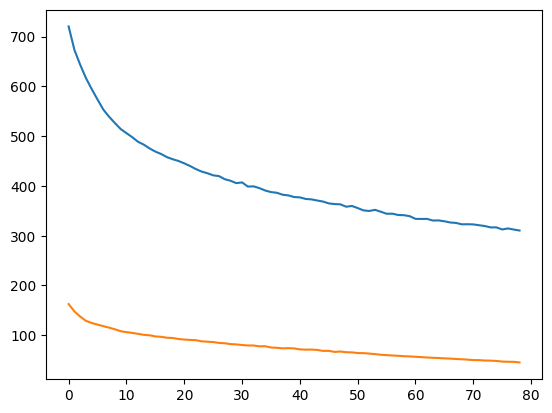

In [93]:
plt.plot(range(len(user_wcss)), user_wcss)
plt.plot(range(len(assistant_wcss)), assistant_wcss)

In [95]:
best_cluster_number_user = 60
best_cluster_number_assistant = 10

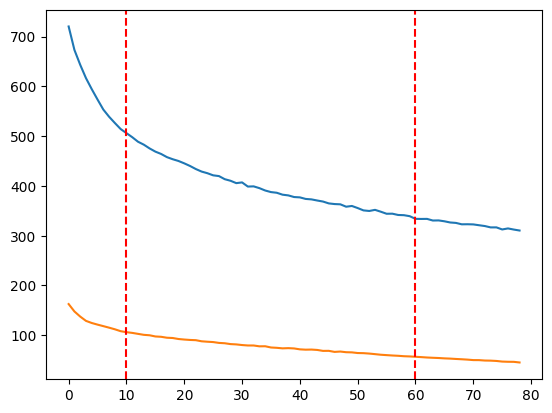

In [96]:
plt.plot(range(len(user_wcss)), user_wcss)
plt.plot(range(len(assistant_wcss)), assistant_wcss)
plt.axvline(best_cluster_number_user, linestyle='--', color='r')
plt.axvline(best_cluster_number_assistant, linestyle='--', color='r')

c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot: >

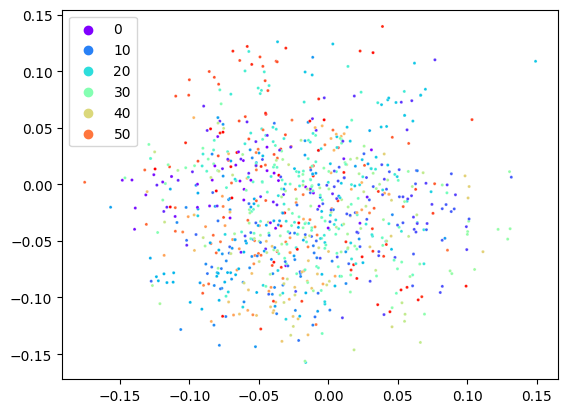

In [98]:
kmeans_user = KMeans(n_clusters=best_cluster_number_user, random_state=42)
kmeans_assistant = KMeans(n_clusters=best_cluster_number_assistant, random_state=42)

kmeans_user.fit(user_ìtems)
kmeans_assistant.fit(assistant_ìtems)

sns.scatterplot(x = user_ìtems[:,0], y = user_ìtems[:,1], hue=kmeans_user.labels_,palette="rainbow", s=5)

<AxesSubplot: >

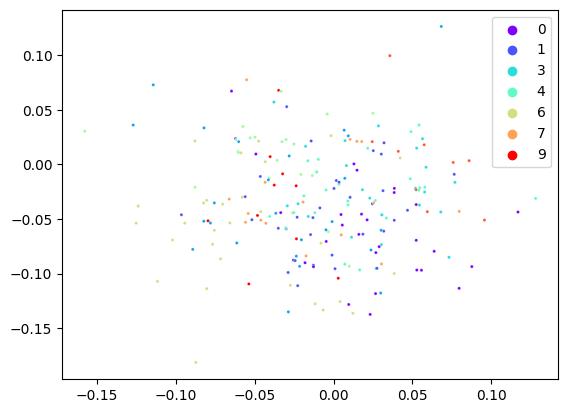

In [99]:
sns.scatterplot(x = assistant_ìtems[:,0], y = assistant_ìtems[:,1], hue=kmeans_assistant.labels_,palette="rainbow", s=5)

In [100]:
df.head(20)

,conversation_id,index,speaker,text,intent,line_intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,15,U57
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,1,
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,10,U36
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,46,
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,15,U43
5,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,5.0,assistant,"Oh, sorry about that. So you’re interested in ...",15,
6,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,6.0,user,yeah,55,U3
7,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,7.0,assistant,OK. I show one action movie playing at AMC Mou...,52,
8,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,8.0,user,yeah but 9.10pm will be perfect for me,29,U50
9,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,9.0,assistant,Great. And how many tickets?,16,


In [75]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca_items= pca.fit_transform(user_ìtems)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08429062 0.0591172 ]
[7.792186 6.525692]


c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<AxesSubplot: >

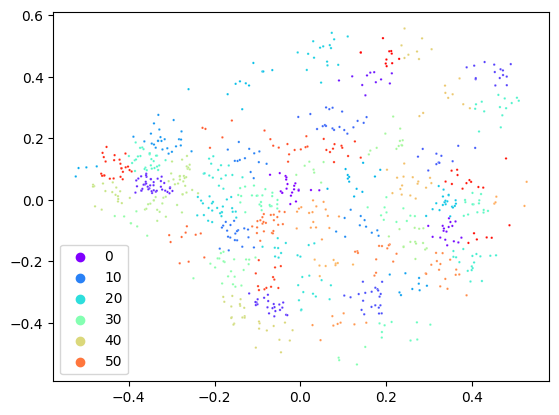

In [76]:
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(pca_items)
sns.scatterplot(x = pca_items[:,0], y = pca_items[:,1], hue=kmeans.labels_,palette="rainbow", s=3)

In [77]:
df['line_intent'] = ''

In [81]:
speaker = 'user'
for line,label in zip(unique_lines, kmeans.labels_):
    df.loc[df.query('speaker == @speaker and text == @line').index, 'line_intent'] ="U" + str(label)

In [82]:
df.head(20)

,conversation_id,index,speaker,text,intent,line_intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,15,U57
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,1,
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,10,U36
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,46,
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,15,U43
5,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,5.0,assistant,"Oh, sorry about that. So you’re interested in ...",15,
6,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,6.0,user,yeah,55,U3
7,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,7.0,assistant,OK. I show one action movie playing at AMC Mou...,52,
8,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,8.0,user,yeah but 9.10pm will be perfect for me,29,U50
9,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,9.0,assistant,Great. And how many tickets?,16,


In [ ]:
ìtems = embeddings1.to(device).detach().numpy()
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(ìtems)
sns.scatterplot(x = ìtems[:,0], y = ìtems[:,1], hue=kmeans.labels_,palette="rainbow", s=5)